In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

In [2]:
print('pandas    : ',pd.__version__)
print('numpy     : ',np.__version__)
print('matplotlib: ',matplotlib.__version__)
print('seaborn   : ',sns.__version__)

pandas    :  0.25.1
numpy     :  1.17.3
matplotlib:  3.1.1
seaborn   :  0.9.0


In [3]:
df = pd.read_csv('train.csv', index_col=0)

### Анализ данных

In [4]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(3)
memory usage: 1.5+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.000,50.401,43.588,0.000,20.000,36.000,75.000,209.000
Rooms,10000.000,1.891,0.840,0.000,1.000,2.000,2.000,19.000
Square,10000.000,56.316,21.059,1.137,41.775,52.513,65.901,641.065
LifeSquare,7887.000,37.200,86.241,0.371,22.770,32.781,45.129,7480.592
KitchenSquare,10000.000,6.273,28.561,0.000,1.000,6.000,9.000,2014.000
Floor,10000.000,8.527,5.241,1.000,4.000,7.000,12.000,42.000
HouseFloor,10000.000,12.609,6.776,0.000,9.000,13.000,17.000,117.000
HouseYear,10000.000,3990.166,200500.261,1910.000,1974.000,1977.000,2001.000,20052011.000
Ecology_1,10000.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Social_1,10000.000,24.687,17.533,0.000,6.000,25.000,36.000,74.000


##### Удалим 'Healthcare_1', т.к. почти половина незаполненных значений.

In [8]:
df.drop(["Healthcare_1"], axis=1, inplace=True)

#### Посмотрим значения у объектных столбцов:

In [9]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe()

,Ecology_2,Ecology_3,Shops_2
count,10000,10000,10000
unique,2,2,2
top,B,B,B
freq,9903,9725,9175


In [10]:
df_obj.Ecology_2.unique()

array(['B', 'A'], dtype=object)

#### График зависимости средней цены квартир от Ecology_2, Ecology_3, Shops_2

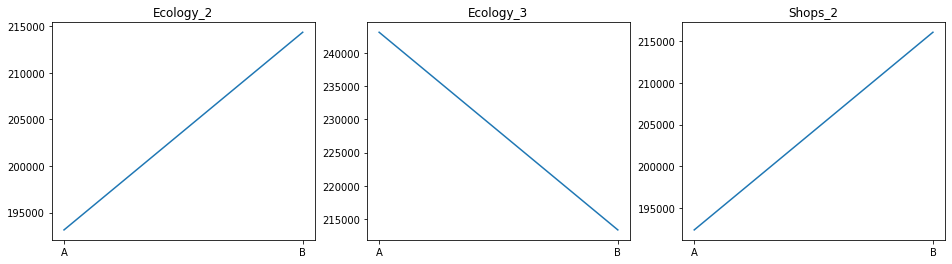

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax1, ax2, ax3 = ax.flatten()
x1 = np.sort(df.Ecology_2.unique())
y1 = df.groupby('Ecology_2').Price.mean()
x2 = np.sort(df.Ecology_3.unique())
y2 = df.groupby('Ecology_3').Price.mean()
x3 = np.sort(df.Shops_2.unique())
y3 = df.groupby('Shops_2').Price.mean()
fig.set_size_inches(16, 4)
ax1.set_title("Ecology_2")
ax1.plot(x1, y1)
ax2.set_title("Ecology_3")
ax2.plot(x2, y2)
ax3.set_title("Shops_2")
ax3.plot(x3, y3)

#### Выведем распределение стоимости квартир по общей площади

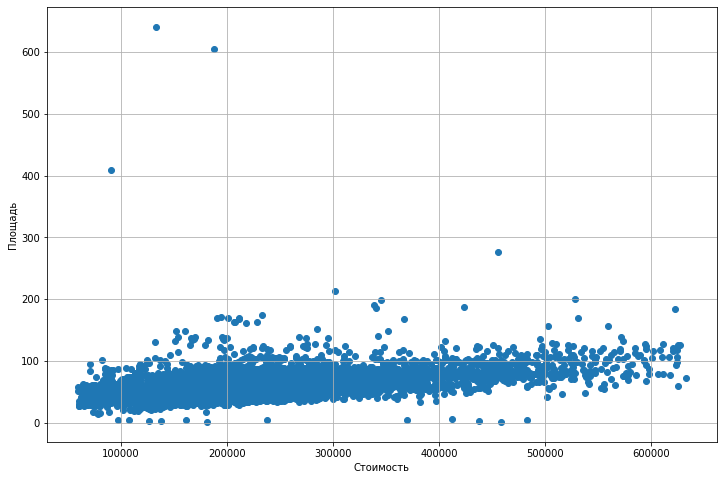

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Price'], df['Square'])
plt.xlabel("Стоимость")
plt.ylabel("Площадь")
plt.grid()
plt.show()

#### Распределение площади от количества комнат

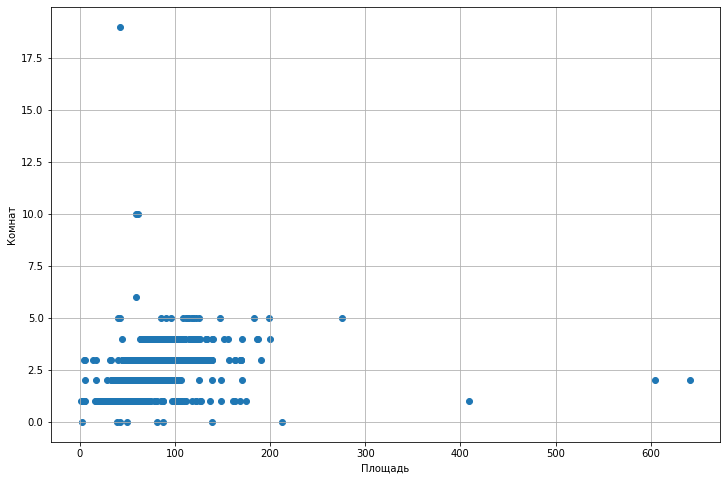

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Square'], df['Rooms'])
plt.xlabel("Площадь")
plt.ylabel("Комнат")
plt.grid()
plt.show()

In [14]:
df.query("Square > 250")

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
5548,86,5.000,275.645,233.949,26.000,12,37.000,2011,0.162,B,A,31,7010,5,3,7,B,455264.883
28,9,2.000,604.706,nan,1.000,17,18.000,1977,0.162,B,B,25,5648,1,2,4,B,187717.243
2307,102,1.000,409.425,410.640,10.000,4,4.000,2016,0.239,B,B,26,3889,6,3,6,B,90470.431
11602,30,2.000,641.065,638.163,10.000,20,19.000,2019,0.000,B,B,22,6398,141,3,23,B,133529.682


In [15]:
df.query("Square < 15")

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
1748,88,2.000,5.497,67.629,1.000,24,22.000,1977,0.127,B,B,43,8429,3,3,9,B,412511.089
11526,27,1.000,4.633,1.970,1.000,18,1.000,1977,0.012,B,B,4,915,0,0,0,B,107604.269
10202,6,1.000,2.596,4.605,1.000,3,25.000,2014,0.243,B,B,5,1564,0,0,0,B,137597.601
10527,27,1.000,4.381,40.806,1.000,10,17.000,2013,0.211,B,B,9,1892,0,0,1,B,97560.720
9487,5,1.000,5.129,5.549,1.000,1,1.000,1977,0.151,B,B,16,3433,4,4,5,B,369472.403
12676,81,3.000,13.785,15.989,7.000,4,5.000,1960,0.320,B,B,25,4756,16,5,8,B,78388.806
3224,27,0.000,2.377,0.873,0.000,1,0.000,1977,0.018,B,B,2,469,0,0,0,B,126596.942
4504,27,3.000,4.390,5.611,1.000,8,19.000,2016,0.211,B,B,9,1892,0,0,1,B,161379.067
14786,1,1.000,1.137,4.526,1.000,3,1.000,1977,0.007,B,B,1,264,0,0,1,B,181434.826


#### Исправим площадь и удалим квартиры с маленькой площадью

In [16]:
df.loc[(df['Square'] < 14) & (df['LifeSquare'] > 15), 'Square'] = df['LifeSquare']/0.62
df = df.drop(df[(df.Square < 15)].index)

#### Количество и средняя стоимость квартир по кол-ву комнат

In [17]:
df.groupby('Rooms').Price.agg(['mean','count'])

,mean,count
Rooms,,
0.000,210984.307,7
1.000,159565.019,3698
2.000,215256.306,3880
3.000,289395.240,2234
4.000,383251.101,150
5.000,410431.606,18
6.000,229661.964,1
10.000,244797.297,2
19.000,78364.617,1


#### Проанализируем выбросы по количеству комнат

In [18]:
df.query("Rooms > 5 | Rooms < 1")

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
5927,57,10.000,59.057,36.223,10.000,22,22.000,2002,0.091,B,B,74,19083,2,5,15,B,317265.324
12638,27,0.000,138.428,136.215,0.000,4,3.000,2016,0.075,B,B,11,3097,0,0,0,B,268394.744
8491,1,19.000,42.006,21.779,7.000,17,17.000,2014,0.007,B,B,1,264,0,0,1,B,78364.617
7917,27,0.000,212.932,211.231,0.000,2,3.000,2008,0.211,B,B,9,1892,0,0,1,B,302211.261
14003,99,6.000,59.414,38.702,6.000,7,9.000,1969,0.033,B,B,66,10573,1,3,8,B,229661.964
7317,27,0.000,41.791,nan,0.000,13,0.000,1977,0.211,B,B,9,1892,0,0,1,B,98129.977
770,28,0.000,49.484,nan,0.000,16,0.000,2015,0.119,B,B,30,6207,1,1,0,B,217009.338
456,6,0.000,81.491,nan,0.000,4,0.000,1977,0.243,B,B,5,1564,0,0,0,B,212864.799
3159,88,0.000,38.697,19.345,9.000,9,16.000,1982,0.127,B,B,43,8429,3,3,9,B,158998.111


#### Выведем распределение стоимости квартир по количеству комнат

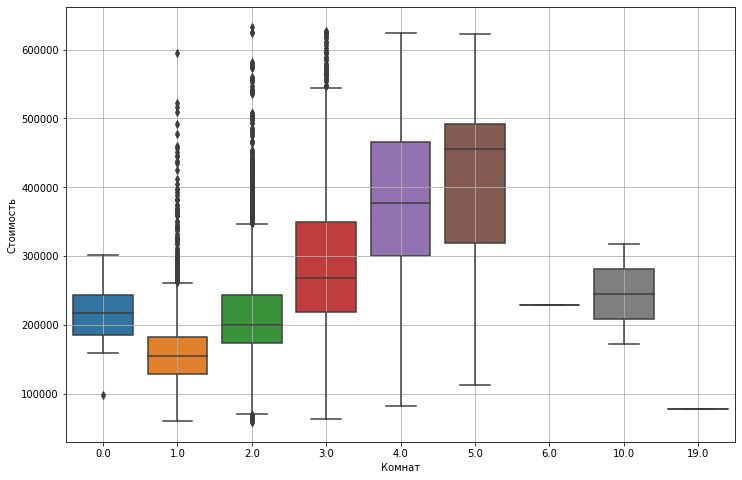

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['Rooms'], df['Price']);
plt.xlabel("Комнат")
plt.ylabel("Стоимость")
plt.grid()
plt.show()

In [20]:
df.query("LifeSquare > 250")

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
14990,23,2.000,48.450,263.542,5.000,6,5.000,1972,0.076,B,B,6,1437,3,0,2,B,141780.232
16550,27,3.000,81.694,7480.592,1.000,9,17.000,2016,0.018,B,B,2,469,0,0,0,B,217357.492
2307,102,1.000,409.425,410.640,10.000,4,4.000,2016,0.239,B,B,26,3889,6,3,6,B,90470.431
11602,30,2.000,641.065,638.163,10.000,20,19.000,2019,0.000,B,B,22,6398,141,3,23,B,133529.682
15886,85,3.000,78.059,461.464,10.000,12,16.000,1998,0.037,B,B,52,11217,1,1,7,B,394253.300


#### Есть ли квартиры, где жилая площадь больше общей?

In [21]:
df.loc[df['LifeSquare'] > df['Square'], :].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
8054,23,1.000,42.530,43.968,1.000,3,9.000,2014,0.035,B,B,0,168,0,0,0,B,95338.199
10521,38,3.000,104.211,106.340,0.000,20,0.000,2017,0.061,B,B,15,2787,2,0,7,B,435462.048
2301,1,2.000,61.400,65.225,0.000,17,22.000,2016,0.007,B,B,1,264,0,0,1,B,199215.452
8753,25,3.000,85.952,89.804,1.000,4,3.000,2017,0.070,B,B,53,13670,4,1,11,B,309688.593
9870,62,1.000,51.831,53.491,1.000,5,1.000,2015,0.072,B,B,2,629,1,0,0,A,131797.472


#### Анализ площади кухни

In [22]:
df['KitchenSquare'].describe()

count   9991.000
mean       6.278
std       28.573
min        0.000
25%        1.000
50%        6.000
75%        9.000
max     2014.000
Name: KitchenSquare, dtype: float64

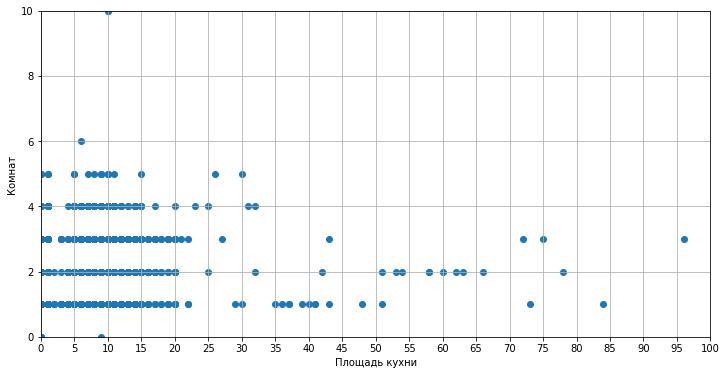

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['KitchenSquare'], df['Rooms'])
plt.xlabel("Площадь кухни")
plt.ylabel("Комнат")
ax.axis([0, 100, 0, 10])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.grid()
fig.set_figwidth(12)
fig.set_figheight(6)
plt.show()

In [24]:
df['KitchenSquare'].value_counts().head(15)

1.000     2452
8.000     1306
5.000     1169
10.000    1075
6.000     1038
9.000      843
0.000      696
7.000      609
12.000     249
11.000     233
13.000      67
14.000      51
4.000       39
15.000      31
3.000       22
Name: KitchenSquare, dtype: int64

#### Если ли площадь кухни больше общей площади?

In [25]:
df.loc[df['KitchenSquare'] > df['Square'], :].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
14656,62,1.000,47.101,46.448,2014.000,4,1.000,2014,0.072,B,B,2,629,1,0,0,A,108337.484
13703,42,1.000,38.072,19.724,73.000,9,10.000,2006,0.158,B,B,21,5731,0,1,0,B,160488.033
6569,27,1.000,38.220,18.717,84.000,4,17.000,2018,0.012,B,B,4,915,0,0,0,B,99079.961
14679,81,1.000,32.277,19.278,1970.000,6,1.000,1977,0.006,B,B,30,5285,0,6,6,B,105539.556


#### Анализ этажности домов

In [26]:
df['HouseFloor'].value_counts().head(15)

17.000    2331
9.000     1389
12.000    1074
5.000     1031
14.000     625
16.000     576
1.000      492
25.000     373
22.000     343
0.000      268
24.000     176
8.000      141
10.000     135
4.000      133
3.000      127
Name: HouseFloor, dtype: int64

#### Есть ли этажи квартир больше этажности дома?

In [27]:
df.loc[df['Floor'] > df['HouseFloor'], :].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
11993,74,2.000,80.313,nan,0.000,14,0.000,1977,0.076,B,B,6,1437,3,0,2,B,221244.157
10953,27,1.000,53.769,52.408,1.000,5,4.000,1977,0.072,B,B,2,629,1,0,0,A,140647.566
2119,27,2.000,49.361,31.994,5.000,6,5.000,1983,0.052,B,B,5,1227,0,0,0,B,117000.381
11935,27,2.000,64.712,nan,1.000,15,1.000,1977,0.211,B,B,9,1892,0,0,1,B,127200.027
6641,54,3.000,118.908,nan,0.000,2,0.000,1977,0.006,B,B,30,5285,0,6,6,B,571069.053


In [28]:
df.query("HouseYear > 2020")

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,
10814,109,1.000,37.265,20.240,9.000,9,12.000,20052011,0.136,B,B,30,6141,10,3,6,B,254084.534
11607,147,2.000,44.792,28.360,5.000,4,9.000,4968,0.320,B,B,25,4756,16,5,8,B,243028.603


#### Исправим ошибки в HouseYear

In [29]:
df.loc[10814, 'HouseYear'] = 2005
df.loc[11607, 'HouseYear'] = 1968

#### Посмотрим на стоимость квартир в зависимости от года постройки дома

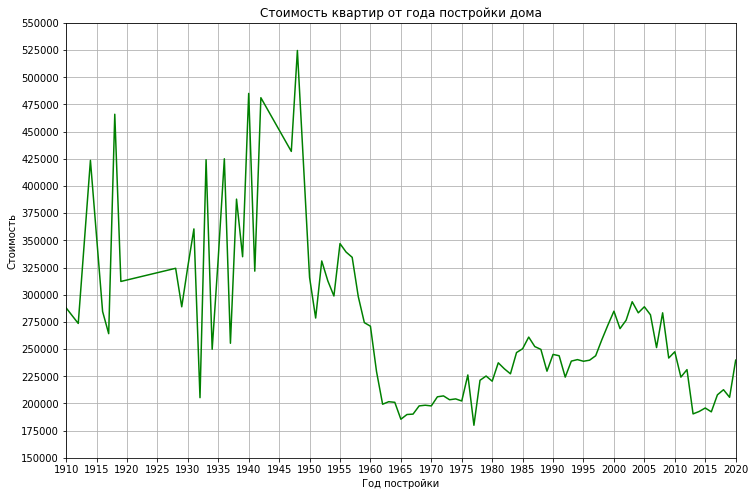

In [30]:
price_df = df[['Price'] + ['HouseYear']]
pdf = price_df.groupby('HouseYear').mean()
fig, ax = plt.subplots()
ax.plot(pdf.index, pdf, color="green")
plt.title("Стоимость квартир от года постройки дома")
plt.xlabel("Год постройки")
plt.ylabel("Стоимость")
ax.axis([1910, 2020, 150000, 550000])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(25000))
ax.grid()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

In [31]:
df['HouseYear'].value_counts().head(10)

1977    2645
2017     308
2016     304
2015     299
2014     209
1970     194
1969     190
1972     178
1971     177
2018     175
Name: HouseYear, dtype: int64

#### Создание функций для обработки данных

In [32]:
def adapt_values(df):
    # Обработка выбросов общей площади
    df.loc[df['Square'] > 300, 'Square'] = df['Square'] * 0.1
    # Обработка количества комнат от площади
    df.loc[df['Rooms'] < 2,'Rooms'] = round(df['Square']/30)
    df.loc[df['Rooms'] == 0,'Rooms'] = 1
    df.loc[df['Rooms'] > 5,'Rooms'] = round(df['Square']/30)
    # Обработка жилой  пложади
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] * 0.62
    df.loc[df['LifeSquare'] >= df['Square'], 'LifeSquare'] = df['Square'] * 0.62
    df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = df['Square'] * 0.62
    df.loc[df['LifeSquare'] < 15, 'LifeSquare'] = df['Square'] * 0.62
    
    # Обработка пложади кухни
    df.loc[df['KitchenSquare'] > 20, 'KitchenSquare'] = 2*df['Rooms'] + 4
    df.loc[df['KitchenSquare'] < 5, 'KitchenSquare'] = 2*df['Rooms'] + 4

    # Обработка этажей
    df.loc[df['HouseFloor'] < 1, 'HouseFloor'] = df['Floor']
    df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = df['Floor'] + 1

    # Обработка года постройки дома
    df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2008
    return df


In [33]:
def prep_unit(df):
    # Заменим объектные данные на целые значения
    df.Ecology_2.replace(['A', 'B'], [0, 1], inplace=True)
    df.Ecology_3.replace(['A', 'B'], [1, 0], inplace=True)
    df.Shops_2.replace(['A', 'B'], [0, 1], inplace=True)
    # Заменим типы данных
    df['DistrictId'] = df.DistrictId.astype('uint8')
    df['Rooms'] = df.Rooms.astype('uint8')
    df['Square'] = df.Square.astype('uint32')
    df['LifeSquare'] = df.LifeSquare.astype('uint32')
    df['KitchenSquare'] = df.KitchenSquare.astype('uint32')
    df['Floor'] = df.Floor.astype('uint8')
    df['HouseFloor'] = df.HouseFloor.astype('uint8')
    df['HouseYear'] = df.HouseYear.astype('uint16')
    df['Ecology_1'] = df.Ecology_1.astype('float16')
    df['Social_1'] = df.Social_1.astype('uint16')
    df['Social_2'] = df.Social_2.astype('uint16')
    df['Social_3'] = df.Social_3.astype('uint16')
    df['Helthcare_2'] = df.Helthcare_2.astype('uint16')
    df['Shops_1'] = df.Shops_1.astype('uint8')    
    return df

In [34]:
def prepare_interval(df):
    interval = pd.interval_range(start=1910, freq=2, end=2020)
    df['Year_range'] = pd.cut(df['HouseYear'], bins=interval)
    return df

In [35]:
def prepare_data(df):
    df = adapt_values(df)
    df = prep_unit(df)
    df = prepare_interval(df)
    return df

df = prepare_data(df)

#### Выведем относительные распределения между признаками

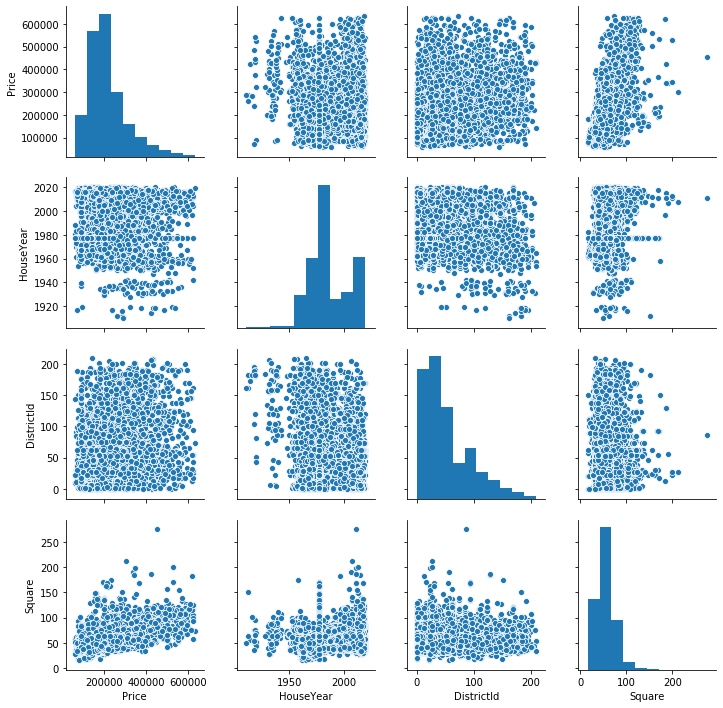

In [37]:
signs = ['Price', 'HouseYear', 'DistrictId', 'Square']
sns.pairplot(df.loc[:, signs])

#### Гистограмма и график плотности распределения годов постройки

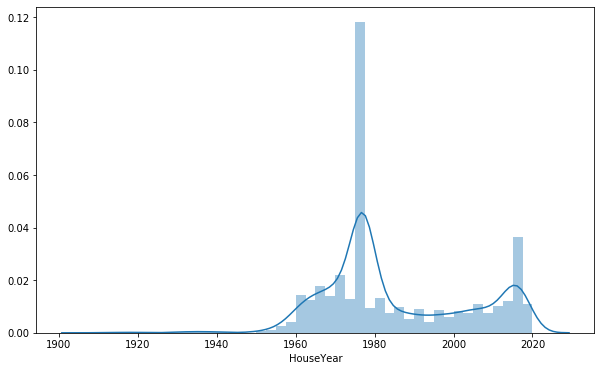

In [39]:
plt.figure(figsize=(10, 6))
sns.distplot(df['HouseYear'])
plt.show()

In [40]:
median_price = df.Price.median()
print("Медианная цена: ",round(median_price))

Медианная цена:  192277


#### Добавим ещё один признак - коэффициент на основе средней цены от года постройки дома (в диапазоне 2 лет)

In [41]:
year_md = df.groupby(['Year_range'], as_index=False)[['Price']].median().rename(columns={'Price':'YR_price'})
year_md['YR_price'] = year_md.YR_price.interpolate(method='linear')

def add_stat(df, year_md):
    df = pd.merge(df, year_md, on=['Year_range'], how='left').set_index(df.index)
    df.fillna({'YR_price': median_price}, inplace=True)
    df['YR_price'] = round(df.YR_price * 0.00001,6)
    df['YR_price'] = df.YR_price.astype('float16')
   
    return df

df = add_stat(df, year_md)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 14038 to 6306
Data columns (total 20 columns):
DistrictId       9991 non-null uint8
Rooms            9991 non-null uint8
Square           9991 non-null uint32
LifeSquare       9991 non-null uint32
KitchenSquare    9991 non-null uint32
Floor            9991 non-null uint8
HouseFloor       9991 non-null uint8
HouseYear        9991 non-null uint16
Ecology_1        9991 non-null float16
Ecology_2        9991 non-null int64
Ecology_3        9991 non-null int64
Social_1         9991 non-null uint16
Social_2         9991 non-null uint16
Social_3         9991 non-null uint16
Helthcare_2      9991 non-null uint16
Shops_1          9991 non-null uint8
Shops_2          9991 non-null int64
Price            9991 non-null float64
Year_range       9990 non-null category
YR_price         9991 non-null float16
dtypes: category(1), float16(2), float64(1), int64(3), uint16(5), uint32(3), uint8(5)
memory usage: 705.9 KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,9991.000,50.425,43.597,0.000,20.000,36.000,75.000,209.000
Rooms,9991.000,1.965,0.785,1.000,1.000,2.000,2.000,7.000
Square,9991.000,55.746,19.087,16.000,41.000,52.000,65.000,275.000
LifeSquare,9991.000,35.386,14.702,9.000,24.000,33.000,43.000,233.000
KitchenSquare,9991.000,7.951,2.115,5.000,6.000,8.000,9.000,20.000
Floor,9991.000,8.526,5.236,1.000,4.000,7.000,12.000,42.000
HouseFloor,9991.000,13.591,6.037,1.000,9.000,14.000,17.000,117.000
HouseYear,9991.000,1984.865,18.414,1910.000,1974.000,1977.000,2001.000,2020.000
Ecology_1,9991.000,0.119,0.119,0.000,0.018,0.075,0.196,0.522
Ecology_2,9991.000,0.990,0.098,0.000,1.000,1.000,1.000,1.000


In [45]:
df.head().T

Id,14038,15053,4765,5809,10783
DistrictId,35,41,53,58,99
Rooms,2,3,2,2,1
Square,47,65,44,53,39
LifeSquare,29,40,29,52,23
KitchenSquare,6,8,8,9,7
Floor,7,7,8,8,11
HouseFloor,9,9,12,17,12
HouseYear,1969,1978,1968,1977,1976
Ecology_1,0.089,0.000,0.050,0.438,0.012
Ecology_2,1,1,1,1,1


In [46]:
df.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
Year_range       1
YR_price         0
dtype: int64

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#### Посмотрим корреляцию признаков к Price

In [49]:
corr_f = df.corr()['Price']
corr_fs = corr_f[corr_f.abs() > 0.10].sort_values(ascending=False)
corr_fs

Price           1.000
Square          0.583
Rooms           0.568
LifeSquare      0.479
YR_price        0.374
KitchenSquare   0.335
DistrictId      0.266
Social_1        0.263
Helthcare_2     0.253
Social_2        0.239
Shops_1         0.180
Floor           0.128
HouseFloor      0.114
Name: Price, dtype: float64

In [50]:
dfc = df.loc[:, corr_fs.index]

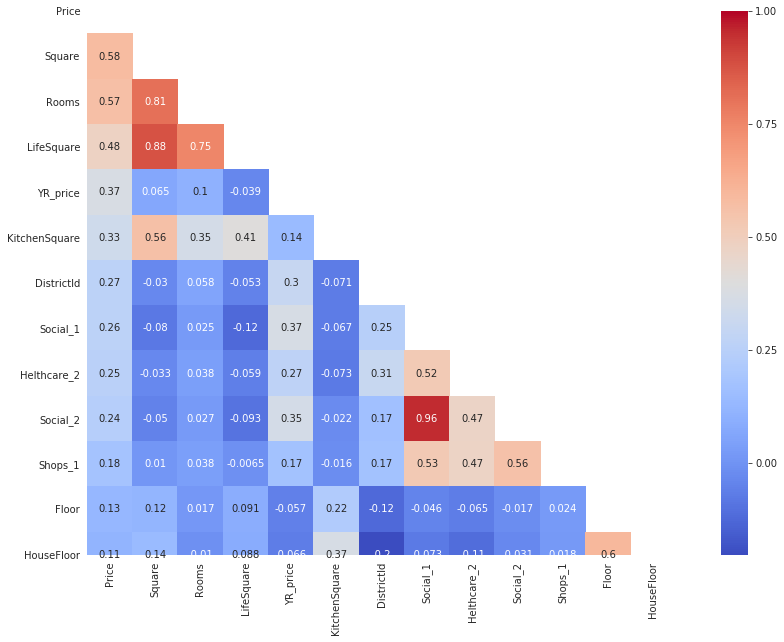

In [51]:
mask = np.zeros_like(dfc.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 10))
#sns.heatmap(dfc.corr(), cmap='coolwarm',annot=True)
with sns.axes_style("white"):
    ax = sns.heatmap(dfc.corr(), cmap='coolwarm', annot=True, mask=mask, square=True)

In [52]:
features = ['Square', 'YR_price', 'KitchenSquare', 'DistrictId',\
            'Social_1', 'Helthcare_2', 'Social_2', 'Shops_1', 'Floor', 'HouseFloor']
y = df[['Price']]
X = df.loc[:, features]

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 14038 to 6306
Data columns (total 10 columns):
Square           9991 non-null uint32
YR_price         9991 non-null float16
KitchenSquare    9991 non-null uint32
DistrictId       9991 non-null uint8
Social_1         9991 non-null uint16
Helthcare_2      9991 non-null uint16
Social_2         9991 non-null uint16
Shops_1          9991 non-null uint8
Floor            9991 non-null uint8
HouseFloor       9991 non-null uint8
dtypes: float16(1), uint16(3), uint32(2), uint8(4)
memory usage: 273.2 KB


In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
xgb = XGBRegressor(objective ='reg:squarederror', eta=0.2, n_estimators=175, max_depth=6, learning_rate=0.1,\
                   max_features="auto", nthread=-1)
xgb.fit(X_train, y_train.values[:, 0])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, max_features='auto', min_child_weight=1, missing=None,
             n_estimators=175, n_jobs=1, nthread=-1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [56]:
ypred = xgb.predict(X_valid)
R2 = r2_score(y_valid, ypred)
print("R2 = ",round(R2,6))

R2 =  0.765228


#### Загрузка тестового датасета

In [57]:
tdf = pd.read_csv('test.csv', index_col=0)

In [58]:
tdf = prepare_data(tdf)
tdf = add_stat(tdf, year_md)

In [59]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 20 columns):
DistrictId       5000 non-null uint8
Rooms            5000 non-null uint8
Square           5000 non-null uint32
LifeSquare       5000 non-null uint32
KitchenSquare    5000 non-null uint32
Floor            5000 non-null uint8
HouseFloor       5000 non-null uint8
HouseYear        5000 non-null uint16
Ecology_1        5000 non-null float16
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null uint16
Social_2         5000 non-null uint16
Social_3         5000 non-null uint16
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null uint16
Shops_1          5000 non-null uint8
Shops_2          5000 non-null int64
Year_range       4997 non-null category
YR_price         5000 non-null float16
dtypes: category(1), float16(2), float64(1), int64(3), uint16(5), uint32(3), uint8(5)
memory usage: 354.9 KB


In [60]:
DFX = tdf.loc[:, features]
DFX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 10 columns):
Square           5000 non-null uint32
YR_price         5000 non-null float16
KitchenSquare    5000 non-null uint32
DistrictId       5000 non-null uint8
Social_1         5000 non-null uint16
Helthcare_2      5000 non-null uint16
Social_2         5000 non-null uint16
Shops_1          5000 non-null uint8
Floor            5000 non-null uint8
HouseFloor       5000 non-null uint8
dtypes: float16(1), uint16(3), uint32(2), uint8(4)
memory usage: 136.7 KB


In [61]:
DFX['Price'] = xgb.predict(DFX)

In [62]:
DFX['Price'].head()

Id
725     136394.328
15856   223069.875
5480    133559.719
15664   386973.156
14275   150696.828
Name: Price, dtype: float32

In [63]:
DFX.head(20)

,Square,YR_price,KitchenSquare,DistrictId,Social_1,Helthcare_2,Social_2,Shops_1,Floor,HouseFloor,Price
Id,,,,,,,,,,,
725,49,1.974,6,58,11,0,2748,0,6,14,136394.328
15856,69,1.709,8,74,6,0,1437,2,6,7,223069.875
5480,13,1.923,12,190,30,5,7538,5,2,5,133559.719
15664,73,2.348,9,47,23,3,4583,3,22,22,386973.156
14275,47,1.854,8,27,2,0,629,0,17,17,150696.828
7633,40,1.709,6,53,34,1,7759,3,21,21,226216.812
13329,68,1.709,8,23,6,0,1437,2,2,17,163274.500
5502,48,1.974,6,32,46,3,7960,11,5,14,218370.406
4220,72,2.307,9,96,53,1,14892,4,17,17,288824.250


In [64]:
DFX.loc[:, ['Price']].to_csv('ISamoylenko_predictions.csv')